In [1]:
!nvidia-smi

Mon Jun 27 17:18:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Lấy dữ liệu

In [2]:
!gdown https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
!gdown https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
!gdown https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
!gdown https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
!gdown https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
!gdown https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP

Downloading...
From: https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
To: /content/train.rar
100% 189k/189k [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
To: /content/test.rar
100% 57.5k/57.5k [00:00<00:00, 74.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
To: /content/dev.rar
100% 29.2k/29.2k [00:00<00:00, 45.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
To: /content/VnCoreNLP-1.1.1.jar
100% 27.4M/27.4M [00:00<00:00, 63.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
To: /content/models-20220212T185004Z-001.zip
100% 227k/227k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP
To: /content/data.rar
100% 13.6k/13.6k [00:00<00:00, 21.5MB/s]


In [3]:
!unzip /content/models-20220212T185004Z-001.zip
!unrar x train.rar
!unrar x dev.rar
!unrar x test.rar
!unrar x data.rar

Archive:  /content/models-20220212T185004Z-001.zip
  inflating: models/wordsegmenter/wordsegmenter.rdr  
  inflating: models/wordsegmenter/vi-vocab  

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from train.rar

Creating    train                                                     OK
Extracting  train/sentiments.txt                                           1%  OK 
Extracting  train/sents.txt                                               19% 36% 53% 71% 88% 98%  OK 
Extracting  train/topics.txt                                              99%  OK 
All OK

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from dev.rar

Creating    dev                                                       OK
Extracting  dev/sentiments.txt                                             1%  OK 
Extracting  dev/sents.txt                                                 97%  OK 
Extract

In [4]:
!gdown https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
!mv sentiments.txt train/
!gdown https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
!mv sentiments.txt test/
!gdown https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
!mv sentiments.txt dev/
!gdown https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
!mv topics.txt dev/

Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
To: /content/sentiments.txt
100% 22.9k/22.9k [00:00<00:00, 37.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
To: /content/sentiments.txt
100% 6.33k/6.33k [00:00<00:00, 10.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
To: /content/sentiments.txt
100% 3.17k/3.17k [00:00<00:00, 5.85MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
To: /content/topics.txt
100% 3.17k/3.17k [00:00<00:00, 6.83MB/s]


In [5]:
!rm -r *.rar *.txt *.zip

rm: cannot remove '*.txt': No such file or directory


# Đọc dữ liệu

In [6]:
#@title Library
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import matplotlib.pyplot as plt
import json
import re
from sklearn.model_selection import train_test_split

In [7]:
TRAIN_PATH = "train"
DEV_PATH = "dev"
TEST_PATH = "test"
DATA_ADDED = "data"

In [8]:
data = np.genfromtxt(os.path.join(DATA_ADDED , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DATA_ADDED , 'sentiments.txt'), delimiter='\n', dtype=int)
# topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
added = pd.DataFrame({"text":data,"sentiment":label})
added.to_csv("added_data.csv")

In [9]:
data = np.genfromtxt(os.path.join(DEV_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DEV_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
dev = pd.DataFrame({"text":data,"sentiment":label,"topic":topics})
dev.to_csv("dev.csv")

In [10]:
data = np.genfromtxt(os.path.join(TRAIN_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TRAIN_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(TRAIN_PATH , 'topics.txt'), delimiter='\n', dtype=int)
train = pd.DataFrame({"text":data,"sentiment":label,"topic":topics})
train_original = pd.concat([train , dev], axis = 0 )
train = pd.concat([train , dev, added], axis = 0 )
train_original.to_csv("train_original.csv")
train.to_csv("train.csv")

In [11]:
data = np.genfromtxt(os.path.join(TEST_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TEST_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(TEST_PATH , 'topics.txt'), delimiter='\n', dtype=int)
test = pd.DataFrame({"text":data,"sentiment":label,"topic":topics})
test.to_csv("test.csv")

In [12]:
#@title Install library
!pip install -q -U watermark
!pip install -qq transformers
!pip install -qq sentencepiece
!pip install -qq vncorenlp
!pip install -qq fastBPE
!pip install -qq fairseq
!pip install -qq ray[tune]

     |████████████████████████████████| 4.4 MB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 48.2 MB/s 
     |████████████████████████████████| 596 kB 61.8 MB/s 
     |████████████████████████████████| 101 kB 14.6 MB/s 
     |████████████████████████████████| 1.2 MB 5.3 MB/s 
     |████████████████████████████████| 2.6 MB 5.2 MB/s 
     |████████████████████████████████| 10.9 MB 4.4 MB/s 
     |████████████████████████████████| 123 kB 60.7 MB/s 
     |████████████████████████████████| 92 kB 12.1 MB/s 
     |████████████████████████████████| 236 kB 80.0 MB/s 
     |████████████████████████████████| 112 kB 60.3 MB/s 
     |████████████████████████████████| 54.5 MB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 62.6 MB/s 
     |████████████████████████████████| 4.1 MB 16.9 MB/s 
     |████████████████████████████████| 144 kB 64.7 MB/s 
     |████████████████████████████████| 125 kB 70.9 MB/s 
     |████████████████████████████████| 461 kB 50.1 MB/s 


In [13]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.11.0+cu113
transformers: 4.20.1



# EDA

In [14]:
train = pd.read_csv("train.csv",index_col = 0)
dev = pd.read_csv("dev.csv",index_col = 0)
test = pd.read_csv("test.csv",index_col = 0)
added = pd.read_csv("added_data.csv",index_col = 0)
train_original = pd.read_csv("train_original.csv",index_col = 0)
print("Train original: ",train_original.shape)
print("Train shape: ",train.shape)
print("Dev shape: ", dev.shape)
print("Test shape: ", test.shape)
print("Data Added shape: ", added.shape)

Train original:  (13009, 3)
Train shape:  (14066, 3)
Dev shape:  (1583, 3)
Test shape:  (3166, 3)
Data Added shape:  (1057, 2)


In [15]:
(dev.shape[0]/train.shape[0])*100

11.254087871463103

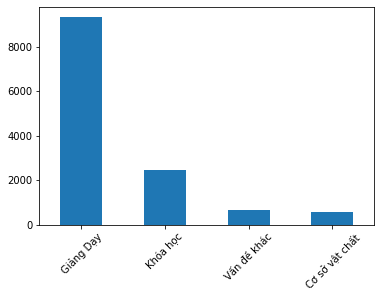

In [16]:
train.topic.map({0: "Giảng Dạy", 1: "Khóa học", 2: "Cơ sở vật chất", 3: "Vấn đề khác"}).value_counts().plot.bar(rot=45)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14066 entries, 0 to 1056
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       14066 non-null  object 
 1   sentiment  14066 non-null  int64  
 2   topic      13009 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 439.6+ KB


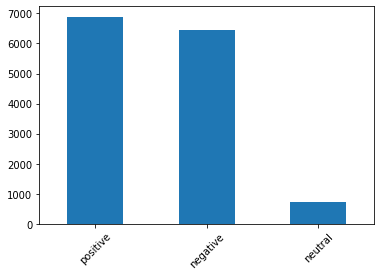

In [18]:
train.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

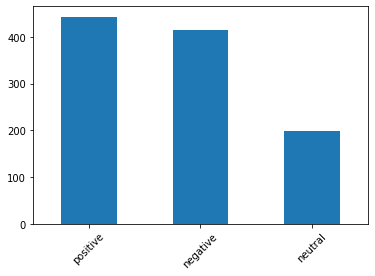

In [19]:
added.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

In [20]:
train.text.apply(lambda x: len(x.split())).describe()

count    14066.000000
mean        13.867695
std          9.876704
min          2.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        161.000000
Name: text, dtype: float64

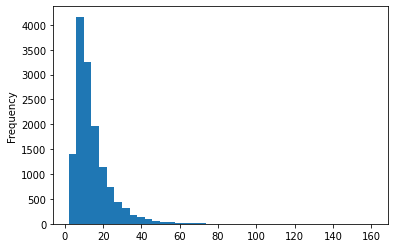

In [21]:
train.text.apply(lambda x: len(x.split())).plot.hist(bins = 40);

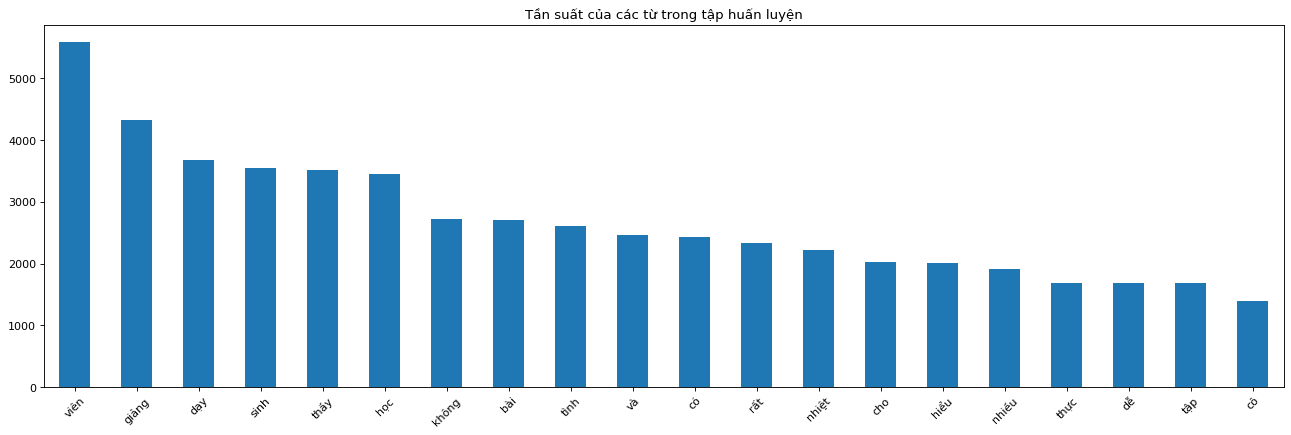

In [22]:
plt.figure(figsize = (20, 6), dpi = 80)
train['text'].str.replace(".","").str.replace(",","").str.split().explode().value_counts().nlargest(20).plot.bar(rot = 45)
plt.title("Tần suất của các từ trong tập huấn luyện");

# LSTM

In [23]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import sys
import os
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D , Dropout

import gensim
import pickle

In [24]:
train.head()

,text,sentiment,topic
0,slide giáo trình đầy đủ .,2,1.0
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2,0.0
2,đi học đầy đủ full điểm chuyên cần .,0,1.0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,0.0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2,0.0


In [25]:
train = train.dropna()

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13009 entries, 0 to 1582
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       13009 non-null  object 
 1   sentiment  13009 non-null  int64  
 2   topic      13009 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 406.5+ KB


In [27]:
MAX_NB_WORDS = 5000 #gioi han tu 
MAX_SEQUENCE_LENGTH = 128 #Do dai cau
EMBEDDING_DIM = 300 #kich thuooc nhung

def dataTokenizer(data):
  
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS) 
    tokenizer.fit_on_texts(data) #build tu dien
    word_index = tokenizer.word_index 
    return tokenizer, word_index

tokenizer, word_index = dataTokenizer(train["text"].values)
print("%d unique tokens" % len(word_index))

2597 unique tokens


In [28]:
pickle.dump(tokenizer, open('tokenizer.pickle', 'wb'))

In [29]:
tk = pickle.load(open('tokenizer.pickle', 'rb'))

In [30]:
X = tokenizer.texts_to_sequences(train["text"].values)
X = pad_sequences(X , maxlen= MAX_SEQUENCE_LENGTH)

In [31]:
y = pd.get_dummies(train["topic"]).values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True ,random_state = 14)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(10407, 128) (10407, 4)
(2602, 128) (2602, 4)


In [33]:
model = Sequential()
#Adding the input LSTM network layer
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
#Adding a second LSTM network layer
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2)) 
#Adding a dense hidden layer
model.add(Dense(64, activation='relu')) 
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # categorical_crossentropy categorical_crossentropy
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 300)          1500000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 128, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 64)                19264     
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,240,724
Trainable params: 2,240,724
Non-trainable params: 0
______________________________________________

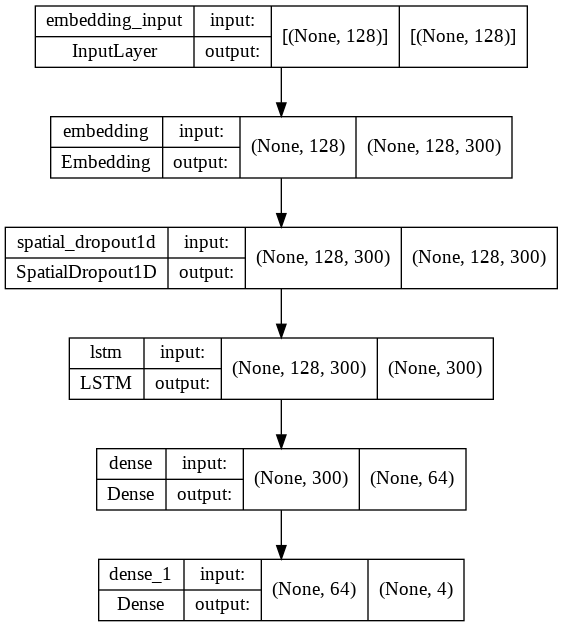

In [34]:
from tensorflow.keras.utils import plot_model
dot_img_file = "lstm.png"
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [35]:
batch = 64
epochs = 6
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train,y_train,batch,epochs, validation_data = (X_test,y_test))

Epoch 1/6
163/163 [==============================] - 119s 674ms/step - loss: 0.6152 - accuracy: 0.7795 - val_loss: 0.4494 - val_accuracy: 0.8332
Epoch 2/6
163/163 [==============================] - 106s 643ms/step - loss: 0.3761 - accuracy: 0.8686 - val_loss: 0.4033 - val_accuracy: 0.8482
Epoch 3/6
163/163 [==============================] - 99s 605ms/step - loss: 0.3271 - accuracy: 0.8873 - val_loss: 0.3703 - val_accuracy: 0.8697
Epoch 4/6
163/163 [==============================] - 101s 617ms/step - loss: 0.2791 - accuracy: 0.9027 - val_loss: 0.3658 - val_accuracy: 0.8713
Epoch 5/6
163/163 [==============================] - 99s 609ms/step - loss: 0.2491 - accuracy: 0.9112 - val_loss: 0.3878 - val_accuracy: 0.8640
Epoch 6/6
163/163 [==============================] - 98s 601ms/step - loss: 0.2299 - accuracy: 0.9208 - val_loss: 0.3851 - val_accuracy: 0.8643


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


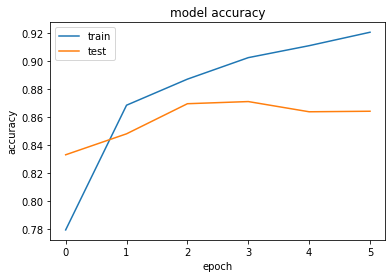

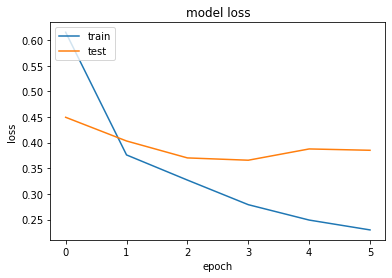

In [36]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
results = model.evaluate(X_test,y_test)
print("Acc : {} , Loss: {}".format(results[1],results[0]))

82/82 [==============================] - 4s 55ms/step - loss: 0.3851 - accuracy: 0.8643
Acc : 0.8643351197242737 , Loss: 0.38514283299446106


In [38]:
model.save("topic.h5") # save model

In [39]:
from tensorflow import keras
model = keras.models.load_model("topic.h5")

In [40]:
model.save("topic_128.h5")

## Inference

In [41]:
########################################
from tensorflow import keras
MAX_SEQUENCE_LENGTH = 128
name_model = "topic_128.h5" 
model_best = keras.models.load_model(name_model)

def pred(input_predict, model):

  if isinstance(input_predict, str):
        input_predict = [input_predict]
  labels = ["Lecturer","Curriculum","Facility","Others"]
  # model_best = keras.models.load_model(name_model)
  # input_predict = [preprocess(pr) for pr in input_predict]
  seq = tokenizer.texts_to_sequences(input_predict)
  padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  for result in pred:
    idx_results = np.argmax(result)
    print("{:.2f}% {}".format(result[idx_results]*100, labels[idx_results]))


In [42]:
pred("thiết bị kém",model_best)

94.82% Facility


### Eval test

F1 score:  0.8632343651295008
              precision    recall  f1-score   support

    Lecturer       0.91      0.94      0.92      2212
  Curriculum       0.80      0.67      0.73       684
    Facility       0.93      0.91      0.92       148
      Others       0.39      0.51      0.44       122

    accuracy                           0.86      3166
   macro avg       0.76      0.76      0.75      3166
weighted avg       0.87      0.86      0.86      3166



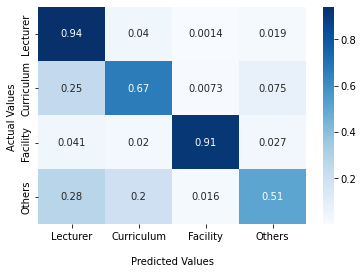

In [43]:
from tensorflow import keras
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
def eval_test(test_path = "test.csv",model_name = "topic.h5"):

  df = pd.read_csv(test_path)
  class_names = ["Lecturer","Curriculum","Facility","Others"]
  model = keras.models.load_model(model_name)
  seq = tokenizer.texts_to_sequences(df.text.values)
  padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  y = df["topic"].values
  pred = model.predict(padded)
  pred = np.argmax(pred, axis = 1)
  print("F1 score: ", f1_score(pred,y,average = "micro" ))
  print(classification_report(pred, y, target_names=class_names))
  cm = confusion_matrix(pred, y,normalize="true")

  ax = sns.heatmap(cm, annot=True, cmap='Blues')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)
eval_test()

## Word2Vector

In [44]:
data = [ temp.split(" ")  for temp in train["text"].values]

In [45]:
word_model = gensim.models.Word2Vec(data, size=300, min_count=1, iter=20)

In [46]:
word_model.wv.most_similar("xấu")

[('gió', 0.8091274499893188),
 ('chữ', 0.8047921657562256),
 ('chém', 0.7901094555854797),
 ('mày', 0.7518002986907959),
 ('mắt', 0.7485874891281128),
 ('buốn', 0.7479007840156555),
 ('rắc', 0.7371701002120972),
 ('cau', 0.7356114387512207),
 ('xưng', 0.7317795157432556),
 ('wzjwz233', 0.7279521226882935)]

In [47]:
embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, 300))
len(word_model.wv.vocab)

2624

In [48]:
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec

In [49]:
model = Sequential()
model.add(Embedding(len(word_model.wv.vocab)+1,300,input_length=X.shape[1],weights=[embedding_matrix],trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 300)          787500    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 128, 300)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dense_2 (Dense)             (None, 64)                19264     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,528,224
Trainable params: 740,724
Non-trainable params: 787,500
________________________________________

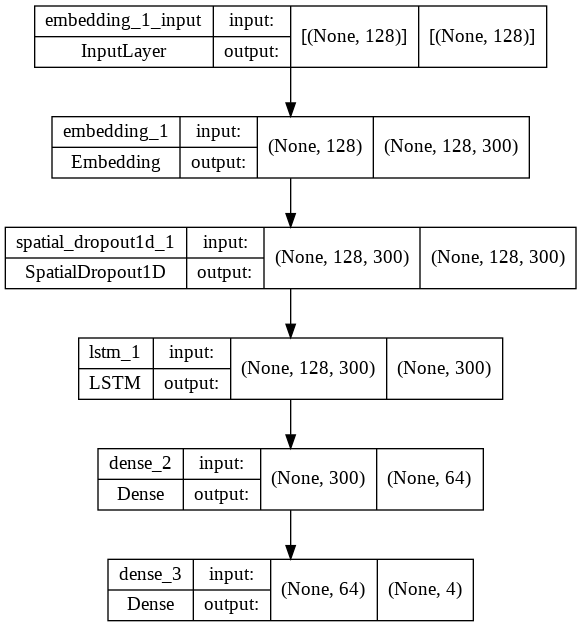

In [50]:
from tensorflow.keras.utils import plot_model
dot_img_file = "w2v_lstm.png"
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [51]:
batch = 64
epochs = 5
history = model.fit(X_train,y_train,batch,epochs, validation_data = (X_test, y_test))

Epoch 1/5
163/163 [==============================] - 90s 534ms/step - loss: 0.6005 - acc: 0.7675 - val_loss: 0.4280 - val_acc: 0.8344
Epoch 2/5
163/163 [==============================] - 84s 519ms/step - loss: 0.4191 - acc: 0.8417 - val_loss: 0.3914 - val_acc: 0.8493
Epoch 3/5
163/163 [==============================] - 84s 515ms/step - loss: 0.3663 - acc: 0.8627 - val_loss: 0.3917 - val_acc: 0.8513
Epoch 4/5
163/163 [==============================] - 85s 523ms/step - loss: 0.3307 - acc: 0.8768 - val_loss: 0.3744 - val_acc: 0.8628
Epoch 5/5
163/163 [==============================] - 93s 569ms/step - loss: 0.2922 - acc: 0.8918 - val_loss: 0.3729 - val_acc: 0.8643


In [52]:
model.evaluate(X_test,y_test)

82/82 [==============================] - 5s 60ms/step - loss: 0.3729 - acc: 0.8643


[0.3729083240032196, 0.8643351197242737]

In [53]:
model.save("w2v_topic128.h5")

## Eval test

F1 score:  0.865129500947568
              precision    recall  f1-score   support

    Lecturer       0.93      0.92      0.92      2301
  Curriculum       0.73      0.71      0.72       592
    Facility       0.88      0.89      0.88       143
      Others       0.45      0.55      0.50       130

    accuracy                           0.87      3166
   macro avg       0.75      0.77      0.76      3166
weighted avg       0.87      0.87      0.87      3166



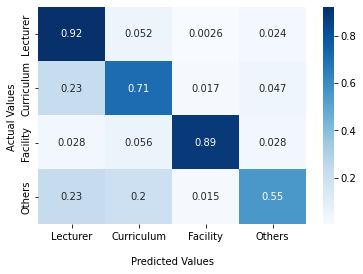

In [54]:
from tensorflow import keras
def eval_test(test_path = "test.csv",model_name = "w2v_topic128.h5"):

    df = pd.read_csv(test_path)
    class_names = ["Lecturer","Curriculum","Facility","Others"]
    model_best = keras.models.load_model(model_name)
    seq = tokenizer.texts_to_sequences(df.text.values)
    MAX_SEQUENCE_LENGTH = 128
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    y = df["topic"].values
    pred = model_best.predict(padded)
    pred = np.argmax(pred, axis = 1)
    print("F1 score: ", f1_score(pred,y,average = "micro" ))
    print(classification_report(pred, y, target_names=class_names))
    cm = confusion_matrix(pred, y ,normalize="true")

    ax = sns.heatmap(cm, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

eval_test()